# Comparisons with networkx's builtin generators

In the last note, [Graph-basics](http://nbviewer.jupyter.org/github/XiaoTaoWang/Think-Complexity-Notes/blob/master/notebooks/Graph-basics.ipynb), we defined functions for generating complete graphs and ER random graphs. Actually, *networkx* provides quite abundant generators for generating kinds of classic graphs conveniently. This note will do some time complexity analysis on our defined functions and *networkx*'s builtin counterparts.

## Platform Information

In [1]:
%load_ext watermark

In [2]:
%watermark -m -v -p numpy,networkx,matplotlib

CPython 2.7.12
IPython 5.1.0

numpy 1.11.1
networkx 1.11
matplotlib 1.5.3

compiler   : MSC v.1500 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
CPU cores  : 4
interpreter: 64bit


## Complete Graphs

Here are functions we defined for generating complete graphs:

In [3]:
def possible_pair(nodes):
    for i, v in enumerate(nodes):
        for j, w in enumerate(nodes):
            if i > j:
                yield v, w

In [4]:
def complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    edges = possible_pair(nodes)
    G.add_edges_from(edges)
    return G

Obviously, the time complexity of our implementation is in O($n^2$), if we plot t(time) versus n(number of nodes) on a log-log scale, we expect an approximate straight line with slope 2.

In *networkx*, *nx.complete_graph* just do the same thing:

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Accent_4
COLORS = Accent_4.hex_colors

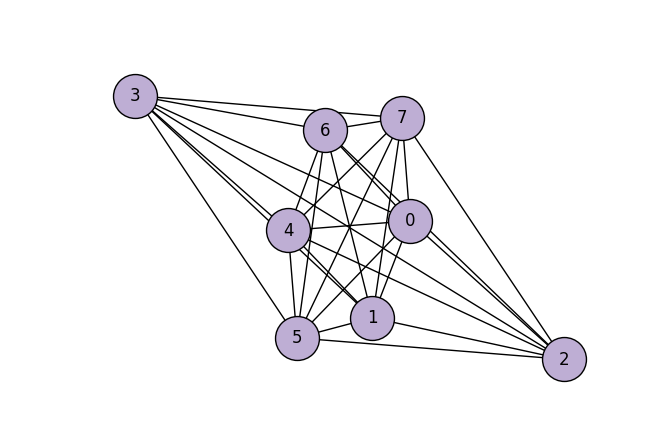

In [6]:
G = nx.complete_graph(8)
nx.draw(G, node_color=COLORS[1], node_size=1000, with_labels=True)
plt.show()

Now, let's do some comparisons between two implementations:

In [7]:
import timeit

In [8]:
import numpy as np
orders_n = np.logspace(1.5, 2.5, 15).astype(int)
print orders_n

[ 31  37  43  51  61  71  84 100 117 138 163 193 227 268 316]


In [9]:
ours_t = []
nx_t = []
for n in orders_n:
    T = timeit.Timer('complete_graph(%d)' % n, 'from __main__ import complete_graph')
    ours_t.append(min(T.repeat(3,10))*1000) # 3 repeats, 10 loops
    T = timeit.Timer('complete_graph(%d)' % n, 'from networkx import complete_graph')
    nx_t.append(min(T.repeat(3,10))*1000)

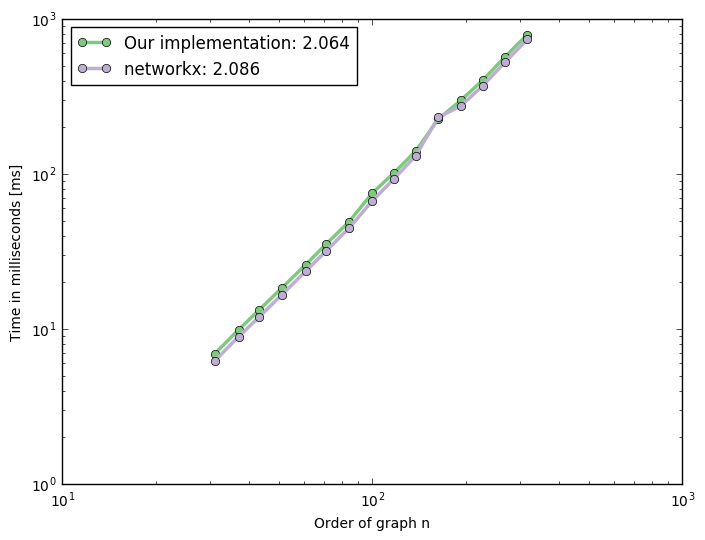

In [10]:
# Estimate the line slopes
x = np.log10(orders_n)
y = np.log10(np.r_['1,2,0', ours_t, nx_t])
slopes = np.polyfit(x, y, 1)[0]
# log-log plot
plt.figure(figsize=(8,6))
plt.plot(orders_n, ours_t, label='Our implementation: %.3f' % slopes[0], color=COLORS[0], marker='o', lw=2.5)
plt.plot(orders_n, nx_t, label='networkx: %.3f' % slopes[1], color=COLORS[1], marker='o', lw=2.5)
plt.xlabel('Order of graph n')
plt.ylabel('Time in milliseconds [ms]')
plt.legend(loc=2)
plt.xscale('log')
plt.yscale('log')
plt.show()

The time complexity and efficiency of this two implementations are almost equivalent, at least under the number of nodes we've tested here.

## ER Random Graphs

Here are functions we defined for G(n,p) and G(n,m):

In [11]:
import random

def random_pair(nodes, p):
    for i, v in enumerate(nodes):
        for j, w in enumerate(nodes):
            if (i > j) and (random.random() < p):
                yield v, w

def ER_gnp(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    edges = random_pair(nodes, p)
    G.add_edges_from(edges)
    return G

def m_pairs(nodes, m):
    pairs = list(possible_pair(nodes))
    selected = random.sample(pairs, m)
    return selected

def ER_gnm(n, m):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    edges = m_pairs(nodes, m)
    G.add_edges_from(edges)
    return G

In theory, the time complexity of our *ER_gnp* and *ER_gnm* is still in O($n^2$).

The counterparts provided by *networkx* are *nx.gnp_random_graph* and *nx.gnm_random_graph*, respectively.

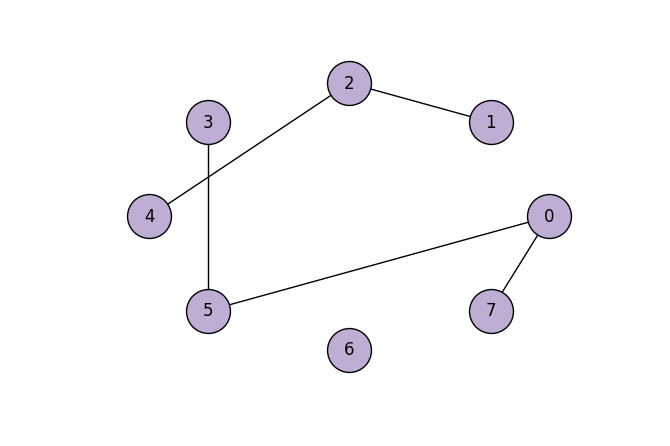

In [12]:
G = nx.gnp_random_graph(8, 0.3)
nx.draw_circular(G, node_color=COLORS[1], node_size=1000, with_labels=True)
plt.show()

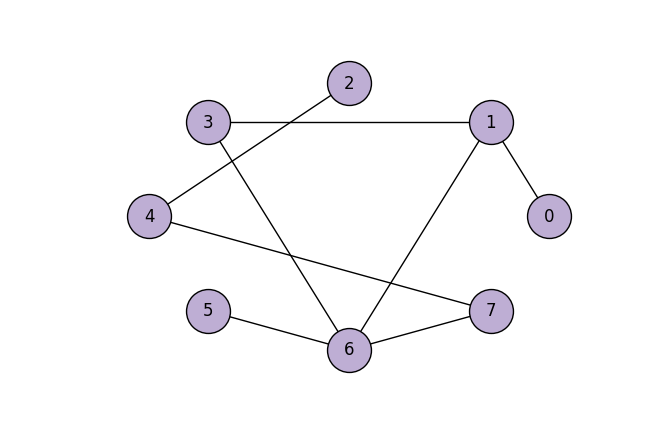

In [13]:
G = nx.gnm_random_graph(8, 8)
nx.draw_circular(G, node_color=COLORS[1], node_size=1000, with_labels=True)
plt.show()

Let's plot time(t) along the increasing number of nodes again.

In [14]:
our_gnp = [];our_gnm = [];nx_gnp = [];nx_gnm = []
for n in orders_n:
    T = timeit.Timer('ER_gnp(%d,0.5)' % n, 'from __main__ import ER_gnp')
    our_gnp.append(min(T.repeat(3,10))*1000) # 3 repeats, 10 loops
    T = timeit.Timer('gnp_random_graph(%d,0.5)' % n, 'from networkx import gnp_random_graph')
    nx_gnp.append(min(T.repeat(3,10))*1000)
    m = int(n*0.5)
    T = timeit.Timer('ER_gnm(%d,%d)' % (n,m), 'from __main__ import ER_gnm')
    our_gnm.append(min(T.repeat(3,10))*1000) # 3 repeats, 10 loops
    T = timeit.Timer('gnm_random_graph(%d,%d)' % (n,m), 'from networkx import gnm_random_graph')
    nx_gnm.append(min(T.repeat(3,10))*1000)

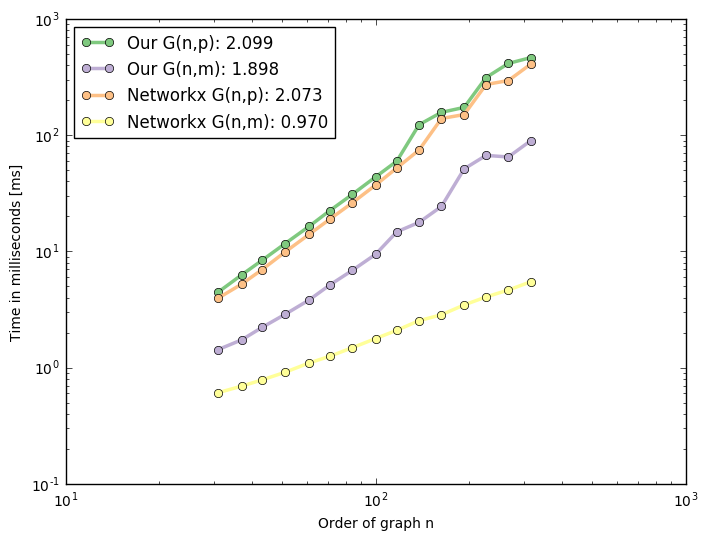

In [15]:
# Estimate the line slope using np.polyfit
x = np.log10(orders_n)
y = np.log10(np.r_['1,2,0', our_gnp, our_gnm, nx_gnp, nx_gnm])
slopes = np.polyfit(x, y, 1)[0]
# Plot
plt.figure(figsize=(8,6))
plt.plot(orders_n, our_gnp, label='Our G(n,p): %.3f' % slopes[0], color=COLORS[0], marker='o', lw=2.5)
plt.plot(orders_n, our_gnm, label='Our G(n,m): %.3f' % slopes[1], color=COLORS[1], marker='o', lw=2.5)
plt.plot(orders_n, nx_gnp, label='Networkx G(n,p): %.3f' % slopes[2], color=COLORS[2], marker='o', lw=2.5)
plt.plot(orders_n, nx_gnm, label='Networkx G(n,m): %.3f' % slopes[3], color=COLORS[3], marker='o', lw=2.5)
plt.xlabel('Order of graph n')
plt.ylabel('Time in milliseconds [ms]')
plt.legend(loc=2)
plt.xscale('log')
plt.yscale('log')
plt.show()

Surprisingly, *networkx*'s G(n,m) runs in linear time!